# Load Library

In [ ]:
pip install feature_engine

In [ ]:
# Import our modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# Load Data

* We use E-Commerce Data from https://www.kaggle.com/carrie1/ecommerce-data.
* This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
* This data contain InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.


## Dataset Column Description
* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Run this only when you run the script using google colaboratory
from google.colab import drive
drive.mount('/content/drive')

import os
# adjust the path with your own google drive folder path
os.chdir("/content/drive/My Drive/Webinar/Big Data Analytics")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# download dataset https://www.kaggle.com/carrie1/ecommerce-data
dataset = pd.read_csv("ecommerce_data.csv",encoding= 'unicode_escape')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# EDA

"an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods"

## Check and remove duplicates

In [ ]:
# Check duplicate
dataset.duplicated().sum()

5268

In [ ]:
# Remove duplicate
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

## Count number of rows and columns

In [ ]:
# Rows and Columns
print("Rows: {}, Columns: {}".format(dataset.shape[0],dataset.shape[1]))

Rows: 536641, Columns: 8


## Data Types
1.   Categorical
> Represents group or categories. Example: seasons (spring, summer, fall, winter)
2.   Numerical
> Represents number, divided to 2 groups:
> * Discrete: can be usually counted in a finite matter, example: number of child
> * Continuous: infinite, example: score, weight, height


In [ ]:
# Cek data types
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Check missing value

In [ ]:
# Check missing value
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
dataset[dataset.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


## Convert data types and add some columns

In [ ]:
# Convert data types for some columns
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"])
dataset["InvoiceDate_date"] = dataset["InvoiceDate"].dt.date
dataset["CustomerID"] = dataset["CustomerID"].astype("str")

dataset.dtypes

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                  object
Country                     object
InvoiceDate_date            object
dtype: object

In [ ]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [ ]:
# Add new column sales with formula = Quantity * UnitPrice
dataset["Sales"] = dataset["Quantity"] * dataset["UnitPrice"]

# Add new column monthyear
dataset["monthyear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M')

dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_date,Sales,monthyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12


In [ ]:
# cek min max date
print("Minimum date: {}, Maximum date: {}".format(dataset["InvoiceDate_date"].min(),dataset["InvoiceDate_date"].max()))

Minimum date: 2010-12-01, Maximum date: 2011-12-09


## Descriptive Statistics

* Mean or Average: The mean is the most widely spread measure of central tendency. It can be easily affected by outliers.
* Median (percentile 50%): The median is the midpoint of the ordered dataset. It’s not affected by outliers.
* Mode: The mode is the value that occurs most often


In [ ]:
# Descriptive statistics untuk numerical data
dataset.describe()

,Quantity,UnitPrice,Sales
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


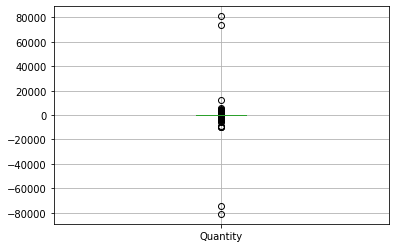

In [ ]:
dataset[["Quantity"]].boxplot()

In [ ]:
# remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

,Quantity
count,478140.000000
mean,4.601525
std,4.554516
min,-12.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,23.000000


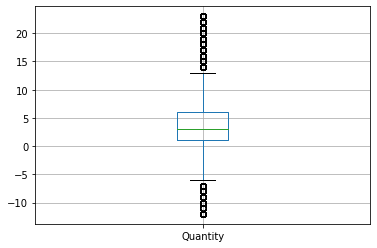

In [ ]:
remove_outlier(dataset,"Quantity")[["Quantity"]].boxplot()
remove_outlier(dataset,"Quantity")[["Quantity"]].describe()

In [ ]:
# Cek distribusi data di setiap variable
for var in dataset:
    variable_name = var
    unique_value = dataset[var].nunique()
    detail = "Unique value: " + str(unique_value)
    completeness = dataset[var].shape[0]-dataset[var].isnull().sum()
    completeness = str(completeness) + " Rows (" + str(round((completeness/dataset[var].shape[0])*100,0)) + "%)"
    # cek berdasarkan tipe data
    if(dataset[var].dtypes=="object"):
      if(unique_value <= 10):
        detail += " \n"
        detail += ", ".join(dataset[var].unique())
    elif(dataset[var].dtypes in ["int64","float64"]):
      detail += " \n"
      detail += "Min Value: " + str(dataset[var].min()) + "\n"
      detail += "Max Value: " + str(dataset[var].max()) + "\n"
      detail += "Med Value: " + str(dataset[var].median()) + "\n"
      detail += "Avg Value: " + str(dataset[var].mean()) + "\n"
      detail += "Sum Value: " + str(dataset[var].sum())
    elif(dataset[var].dtypes=="datetime64[ns]"):
      detail += " \n"
      detail += "Min Value: " + str(dataset[var].min()) + "\n"
      detail += "Max Value: " + str(dataset[var].max())
    print("Variable Name: ", variable_name)
    print(detail)
    print("Completeness: ",completeness,"\n")

Variable Name:  InvoiceNo
Unique value: 25900
Completeness:  536641 Rows (100.0%) 

Variable Name:  StockCode
Unique value: 4070
Completeness:  536641 Rows (100.0%) 

Variable Name:  Description
Unique value: 4223
Completeness:  535187 Rows (100.0%) 

Variable Name:  Quantity
Unique value: 722 
Min Value: -80995
Max Value: 80995
Med Value: 3.0
Avg Value: 9.620029032444409
Sum Value: 5162502
Completeness:  536641 Rows (100.0%) 

Variable Name:  InvoiceDate
Unique value: 23260 
Min Value: 2010-12-01 08:26:00
Max Value: 2011-12-09 12:50:00
Completeness:  536641 Rows (100.0%) 

Variable Name:  UnitPrice
Unique value: 1630 
Min Value: -11062.06
Max Value: 38970.0
Med Value: 2.08
Avg Value: 4.632655674831347
Sum Value: 2486072.974
Completeness:  536641 Rows (100.0%) 

Variable Name:  CustomerID
Unique value: 4373
Completeness:  536641 Rows (100.0%) 

Variable Name:  Country
Unique value: 38
Completeness:  536641 Rows (100.0%) 

Variable Name:  InvoiceDate_date
Unique value: 305
Completeness:

In [ ]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    plt.rcParams.update({'font.size': 12})

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

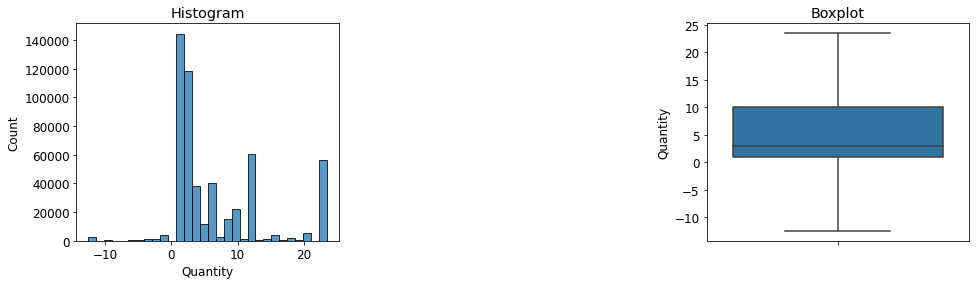

Min Qty: -12.5
Max Qty: 23.5


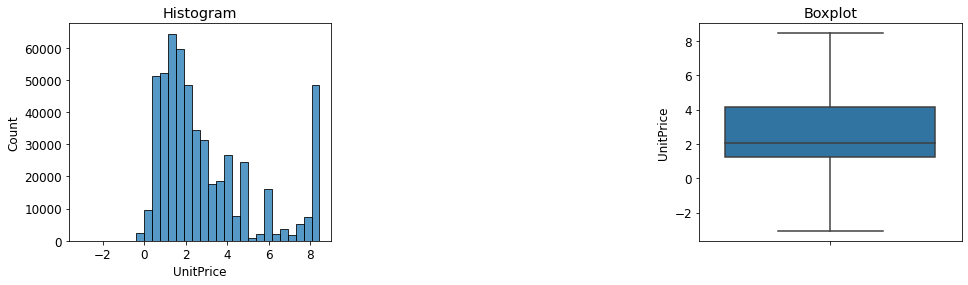

Min Price: -3.0700000000000003
Max Price: 8.45


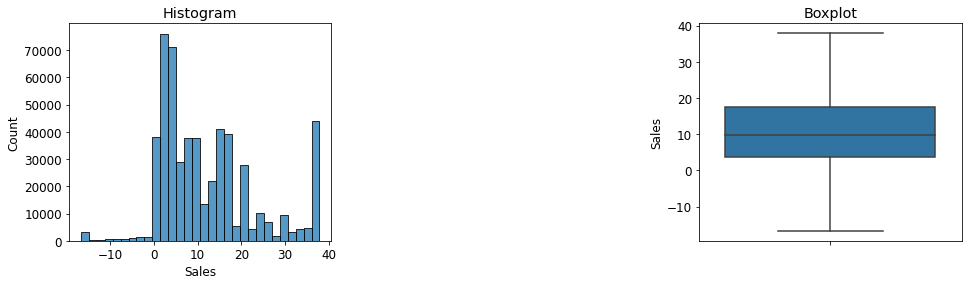

Min Sales: -16.724999999999998
Max Sales: 37.875


In [ ]:
# quantity
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['Quantity'])

windsoriser.fit(dataset)
quantity_t = windsoriser.transform(dataset)
diagnostic_plots(quantity_t, 'Quantity')
print("Min Qty: " + str(quantity_t.Quantity.min()))
print ("Max Qty: " + str(quantity_t.Quantity.max()))

# price
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['UnitPrice'])

windsoriser.fit(dataset)
price_t = windsoriser.transform(dataset)
diagnostic_plots(price_t, 'UnitPrice')
print("Min Price: " + str(price_t.UnitPrice.min()))
print ("Max Price: " + str(price_t.UnitPrice.max()))


# sales
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['Sales'])

windsoriser.fit(dataset)
price_t = windsoriser.transform(dataset)
diagnostic_plots(price_t, 'Sales')
print("Min Sales: " + str(price_t.Sales.min()))
print ("Max Sales: " + str(price_t.Sales.max()))


## Correlation

Correlation is a measure of the joint variability of two variables. It takes on values between - 1 and 1.

* A correlation of 1 known as perfect positive correlation.
* A correlation of 0 means that the variables are independent.
* A correlation of -1 known as perfect negative correlation.



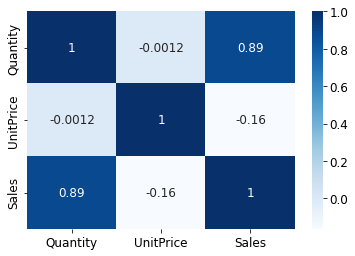

In [ ]:
# correlation
corr = dataset.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Product Performance

In [ ]:
product = dataset.groupby(["StockCode","Description"]).agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','Sales':'sum'}).reset_index()
product = product.sort_values("Sales",ascending=False)
product = product[product.Sales>0]
product

,StockCode,Description,InvoiceNo,CustomerID,Quantity,Sales
4780,DOT,DOTCOM POSTAGE,709,2,707,206245.480
1554,22423,REGENCY CAKESTAND 3 TIER,2169,888,13007,164459.490
3295,47566,PARTY BUNTING,1706,709,18010,98243.880
4223,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2235,859,35006,97659.940
4197,85099B,JUMBO BAG RED RETROSPOT,2135,637,47260,92175.790
...,...,...,...,...,...,...
3348,51014c,"FEATHER PEN,COAL BLACK",1,1,1,0.830
4147,85047,WHITE BEADED GARLAND STRING 20LIGHT,4,4,0,0.800
2710,23366,SET 12 COLOURING PENCILS DOILEY,1,1,1,0.650
3631,84227,HEN HOUSE W CHICK IN NEST,1,1,1,0.420


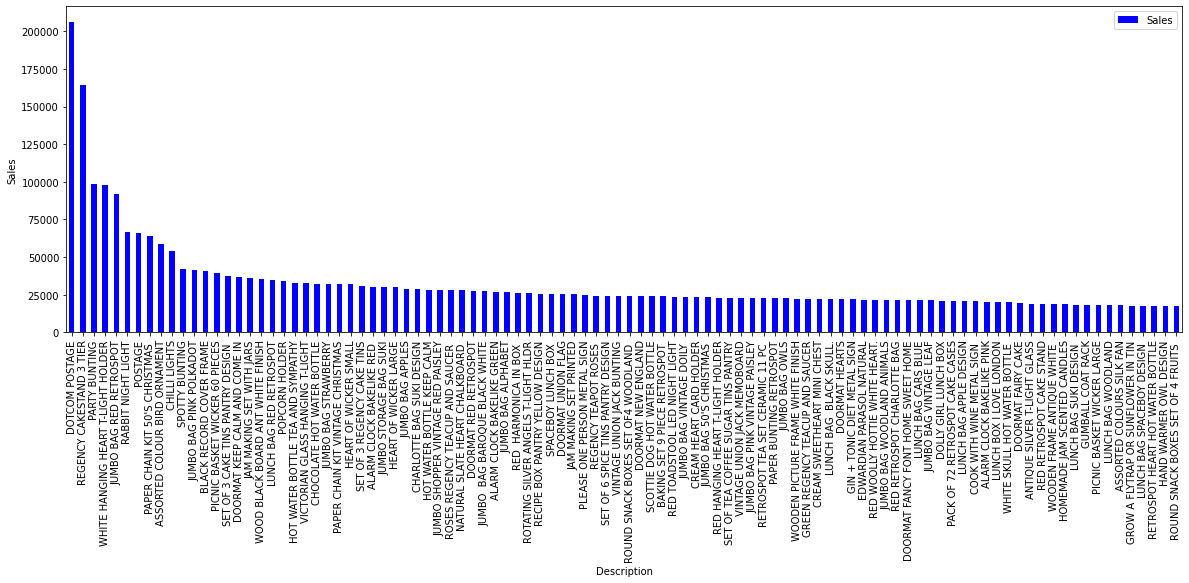

In [ ]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.grid'] = False
product.head(100).plot(kind='bar',x='Description',y='Sales',color='blue')
plt.ylabel('Sales')
plt.show()

# Sales and Customer Trend

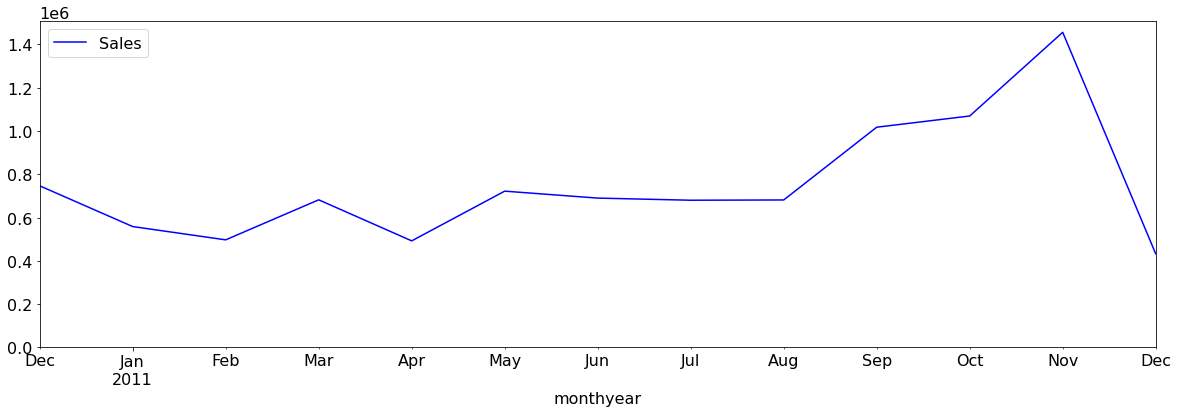

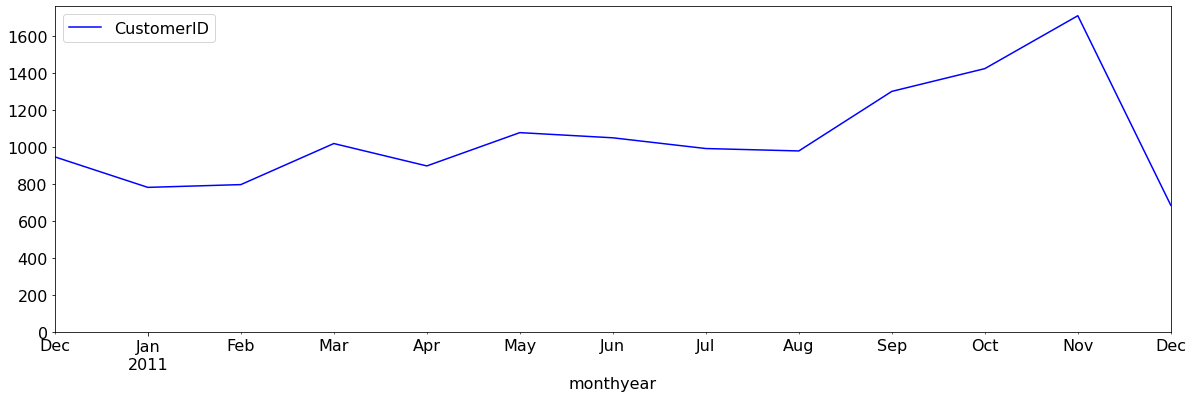

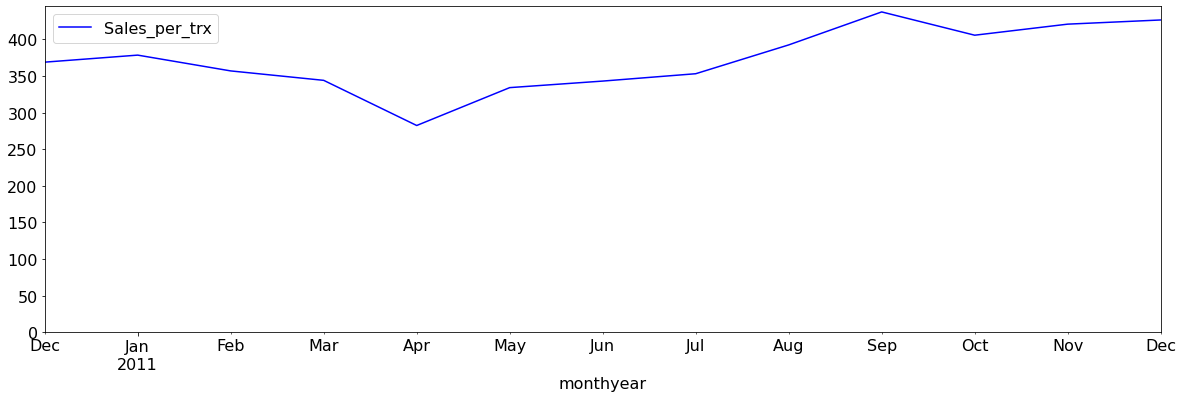

In [ ]:
sales_monthly = dataset.groupby("monthyear").agg({"Sales":"sum","CustomerID":"nunique","UnitPrice":"mean","InvoiceNo":"nunique"}).reset_index()
sales_monthly["Sales_per_trx"] = sales_monthly["Sales"] / sales_monthly["InvoiceNo"]
sales_monthly.to_csv("sales_monthly.csv",index=False)

# plot sales
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
sales_monthly.plot(kind='line',x='monthyear',y='Sales',color='blue')
plt.gca().xaxis.grid(False)
plt.ylim(ymin=0)
plt.show()

# plot customer
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
sales_monthly.plot(kind='line',x='monthyear',y='CustomerID',color='blue')
plt.gca().xaxis.grid(False)
plt.ylim(ymin=0)
plt.show()

# plot price
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
sales_monthly.plot(kind='line',x='monthyear',y='Sales_per_trx',color='blue')
plt.gca().xaxis.grid(False)
plt.ylim(ymin=0)
plt.show()

# Sales by Customer

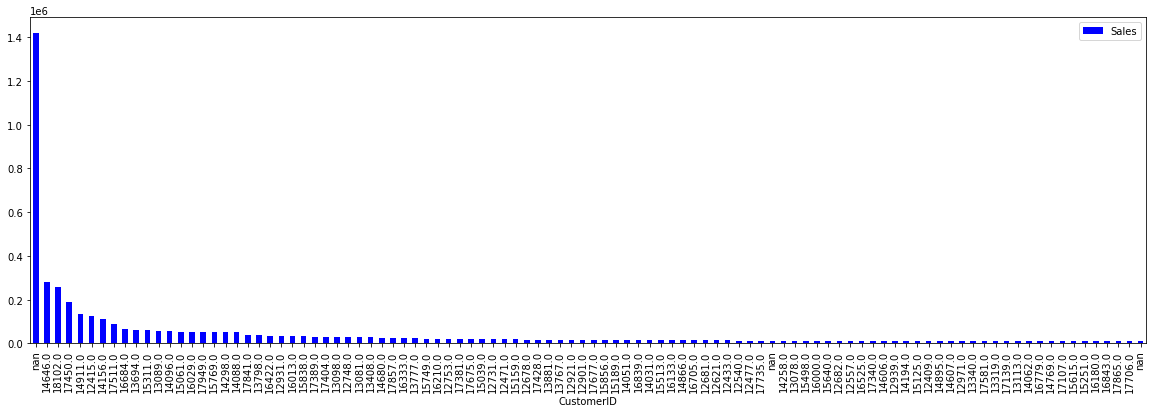

,CustomerID,Country,InvoiceNo,Description,Quantity,Sales
4387,nan,United Kingdom,3637,3546,255458,1419972.03
1711,14646.0,Netherlands,77,721,196719,279489.02
4241,18102.0,United Kingdom,62,163,64122,256438.49
3766,17450.0,United Kingdom,55,128,69009,187322.17
1903,14911.0,EIRE,248,1824,77155,132458.73
57,12415.0,Australia,26,451,77242,123725.45
1353,14156.0,EIRE,66,733,56908,113214.59
3809,17511.0,United Kingdom,46,479,63012,88125.38
3210,16684.0,United Kingdom,31,122,49390,65892.08
1013,13694.0,United Kingdom,60,372,61899,62690.54


In [ ]:
# see the customer with the highest sales
customer = dataset.groupby(["CustomerID","Country"]).agg({'InvoiceNo':'nunique','Description':'nunique','Quantity':'sum','Sales':'sum'}).reset_index()
customer = customer.sort_values("Sales",ascending=False)
customer.to_csv("sales_by_customer.csv", index=False)

plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.grid'] = False
customer.head(100).plot(kind='bar',x='CustomerID',y='Sales',color='blue')
plt.show()

customer.head(20)

# Sales by Country

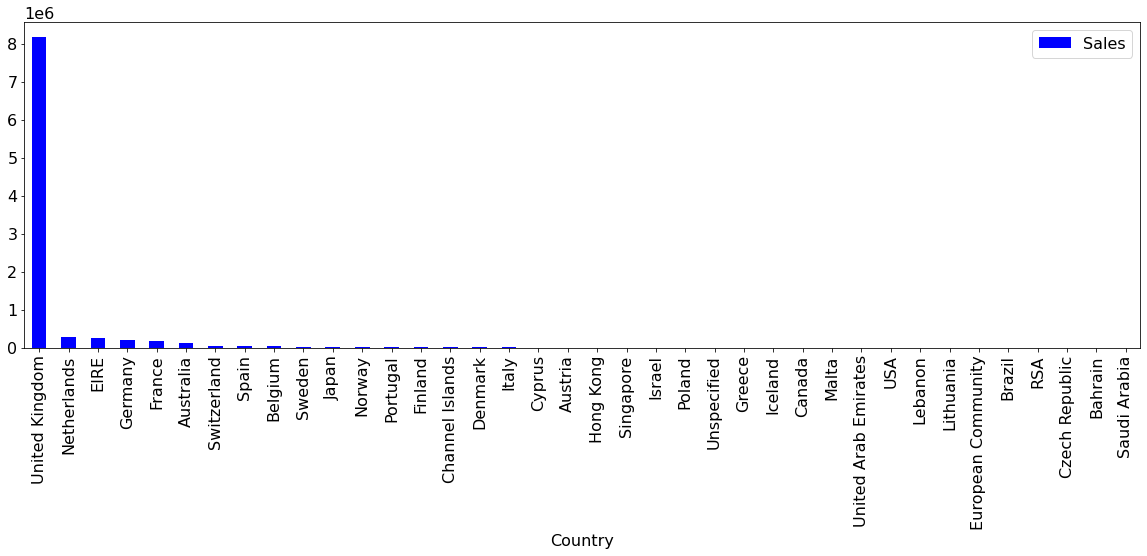

,Country,InvoiceNo,CustomerID,Quantity,Sales
36,United Kingdom,23494,3951,4250328,8167128.184
24,Netherlands,101,9,200128,284661.540
10,EIRE,360,4,142495,262993.380
14,Germany,603,95,117341,221509.470
13,France,461,88,110438,197317.110
0,Australia,69,9,83643,137009.770
33,Switzerland,74,22,30313,56363.050
31,Spain,105,31,26817,54756.030
3,Belgium,119,25,23152,40910.960
32,Sweden,46,8,35632,36585.410


In [ ]:
# get country distribution
country = dataset.groupby('Country').agg({'InvoiceNo':'nunique','CustomerID':'nunique','Quantity':'sum','Sales':'sum'}).reset_index()
country = country.sort_values("Sales",ascending=False)
country.to_csv("sales_by_country.csv",index=False)

plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = False
country.plot(kind='bar',x='Country',y='Sales',color='blue')
plt.show()

country

# New Customer

In [ ]:
# get first trx for each customer
first_trx = dataset.groupby("CustomerID").agg({"monthyear":"min"}).reset_index()
first_trx.columns = ["CustomerID","first_monthyear_trx"]
first_trx

,CustomerID,first_monthyear_trx
0,12346.0,2011-01
1,12347.0,2010-12
2,12348.0,2010-12
3,12349.0,2011-11
4,12350.0,2011-02
...,...,...
4368,18281.0,2011-06
4369,18282.0,2011-08
4370,18283.0,2011-01
4371,18287.0,2011-05


In [ ]:
# differentiate customer type for each month
customer_trx = dataset[["CustomerID","monthyear"]].drop_duplicates()
customer_trx = customer_trx.merge(first_trx,on="CustomerID")
customer_trx.loc[customer_trx.monthyear == customer_trx.first_monthyear_trx,"customer_type"] = "new_customer"
customer_trx.loc[customer_trx.monthyear != customer_trx.first_monthyear_trx,"customer_type"] = "repeated_customer"
customer_trx

,CustomerID,monthyear,first_monthyear_trx,customer_type
0,17850.0,2010-12,2010-12,new_customer
1,17850.0,2011-02,2010-12,repeated_customer
2,13047.0,2010-12,2010-12,new_customer
3,13047.0,2011-01,2010-12,repeated_customer
4,13047.0,2011-02,2010-12,repeated_customer
...,...,...,...,...
13683,13436.0,2011-12,2011-12,new_customer
13684,15520.0,2011-12,2011-12,new_customer
13685,13298.0,2011-12,2011-12,new_customer
13686,14569.0,2011-12,2011-12,new_customer


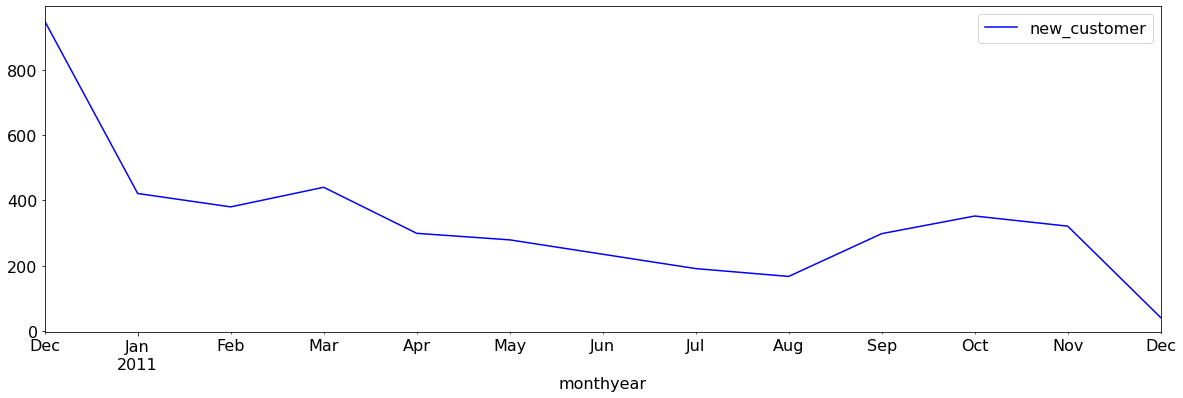

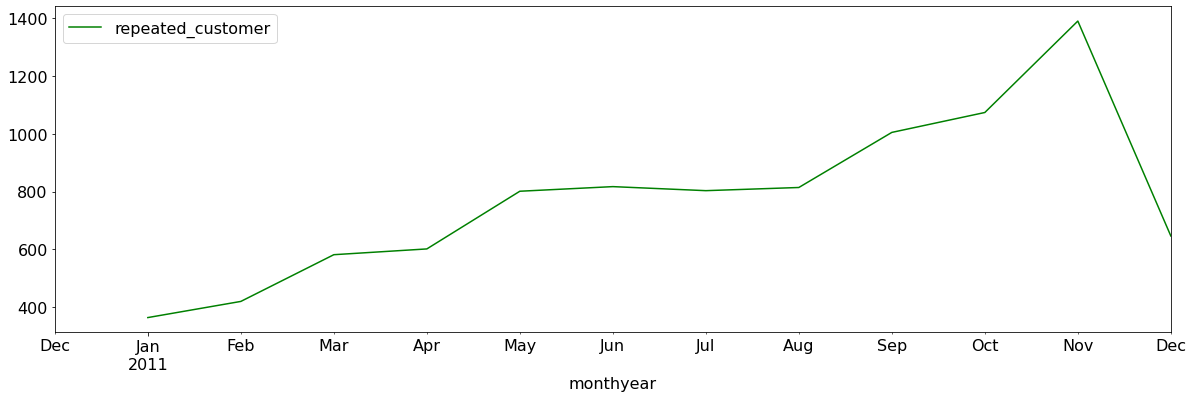

In [ ]:
# visualize proportion new vs repeated customer
customer_type = customer_trx.groupby(["monthyear","customer_type"]).agg({"CustomerID":"nunique"}).reset_index()
customer_type = customer_type.pivot(index='monthyear',columns='customer_type',values='CustomerID').reset_index()

# plot price
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = False
customer_type.plot(kind='line',x='monthyear',y='new_customer',color='blue')
customer_type.plot(kind='line',x='monthyear',y='repeated_customer',color='green')
plt.show()

customer_type.to_csv("customer_type.csv",index=False)